In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_parquet('../data/raw/final_taxi_data.parquet')
df.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,vendor_id,pickup_datetime,dropoff_datetime,payment_type,imp_surcharge
0,1,1.00,-73.962883,40.766521,1,N,-73.975868,40.763676,6.0,0.0,0.5,1.00,0.0,7.80,1,2015-08-26 06:35:08,2015-08-26 06:40:55,1,0.3
1,1,1.15,-74.006599,40.744186,1,N,-73.994347,40.754211,6.5,0.0,0.5,0.00,0.0,7.30,2,2015-08-22 17:25:04,2015-08-22 17:31:04,2,0.3
2,6,3.00,-73.989113,40.758263,1,N,-73.992310,40.725040,15.0,1.0,0.5,3.36,0.0,20.16,2,2015-08-25 17:07:03,2015-08-25 17:28:22,1,0.3
3,1,1.11,-73.994087,40.751228,1,N,-73.981529,40.758717,11.0,0.0,0.5,2.95,0.0,14.75,2,2015-08-03 11:32:22,2015-08-03 11:48:59,1,0.3
4,2,2.34,-73.982079,40.746006,1,N,-73.962326,40.774628,11.0,0.5,0.5,3.08,0.0,15.38,2,2015-08-07 21:33:16,2015-08-07 21:44:54,1,0.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100594 entries, 0 to 100937
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   passenger_count     100594 non-null  int8          
 1   trip_distance       100594 non-null  float32       
 2   pickup_longitude    100594 non-null  float64       
 3   pickup_latitude     100594 non-null  float64       
 4   ratecodeid          100594 non-null  int8          
 5   store_and_fwd_flag  100594 non-null  category      
 6   dropoff_longitude   100594 non-null  float64       
 7   dropoff_latitude    100594 non-null  float64       
 8   fare_amount         100594 non-null  float32       
 9   extra               100594 non-null  float32       
 10  mta_tax             100594 non-null  float32       
 11  tip_amount          100594 non-null  float32       
 12  tolls_amount        100594 non-null  float32       
 13  total_amount        100594 non-nul

In [4]:
df.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,vendor_id,pickup_datetime,dropoff_datetime,payment_type,imp_surcharge
count,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594,100594,100594.000000,100594.000000
mean,1.695121,3.109172,-72.925411,40.171771,1.043323,-73.021807,40.226658,13.078897,0.320829,0.497395,1.664909,0.335058,16.197086,1.528849,2015-08-16 08:58:29.010160,2015-08-16 09:13:18.442004,1.394636,0.299714
min,0.000000,0.000000,-74.296989,0.000000,1.000000,-74.552559,0.000000,-80.000000,-1.000000,-0.500000,0.000000,0.000000,-80.300003,1.000000,2015-08-01 00:00:44,2015-08-01 00:05:09,1.000000,-0.300000
25%,1.000000,1.050000,-73.992393,40.734692,1.000000,-73.991562,40.733700,6.500000,0.000000,0.500000,0.000000,0.000000,8.750000,1.000000,2015-08-08 11:52:22,2015-08-08 12:07:27,1.000000,0.300000
50%,1.000000,1.800000,-73.982269,40.751766,1.000000,-73.980400,40.752460,9.500000,0.000000,0.500000,1.050000,0.000000,11.800000,2.000000,2015-08-16 03:10:56.500000,2015-08-16 03:21:16.500000,1.000000,0.300000
75%,2.000000,3.340000,-73.968094,40.765396,1.000000,-73.963013,40.766872,15.000000,0.500000,0.500000,2.250000,0.000000,17.799999,2.000000,2015-08-23 22:50:20.250000,2015-08-23 23:04:43.750000,2.000000,0.300000
max,6.000000,170.500000,0.000000,41.102951,99.000000,0.000000,41.497978,340.000000,1.500000,0.500000,266.000000,450.000000,450.309998,2.000000,2015-08-31 23:59:42,2015-09-01 00:31:53,4.000000,0.300000
std,1.341564,3.843871,8.741989,4.815621,0.426653,8.335245,4.590389,11.231456,0.362087,0.038528,2.632934,2.108463,13.731123,0.499170,NaN,NaN,0.504330,0.012474


# Generation distance and dt columns

In [5]:
df['trip_time_sec'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.seconds

In [6]:
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday + 1
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday + 1

In [7]:
(df['pickup_weekday'] != df['dropoff_weekday']).mean()

0.011611030478955007

In [8]:
df['weekend_trip'] = (df['pickup_weekday'] >= 5) | (df['dropoff_weekday'] >= 5)

In [9]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

In [10]:
(df['pickup_hour'] != df['dropoff_hour']).mean()

0.22552040877189494

In [12]:
def manhattan(start, end):
    return sum(abs(val1 - val2) for val1, val2 in zip(start, end))

In [13]:
df['trip_distance_manhattan'] = df.apply(
    lambda x: manhattan([x['pickup_latitude'], x['pickup_longitude']], [x['dropoff_latitude'], x['dropoff_longitude']]),
    axis=1)

# Exploring data

## Passenger count

0 passengers occurs very rarely, but it not seems as an error. However it needs further discussions.

C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='passenger_count', ylabel='count'>

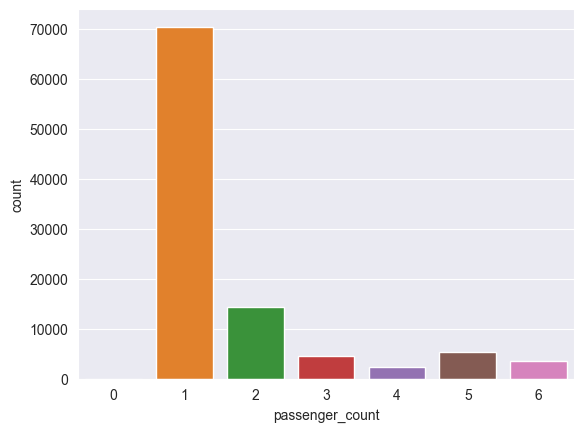

In [14]:
sns.countplot(data=df, x='passenger_count')

In [15]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.699843
2    0.142762
5    0.053969
3    0.045092
6    0.035728
4    0.022566
0    0.000040
Name: proportion, dtype: float64

In [16]:
df['passenger_count'].value_counts(normalize=False)

passenger_count
1    70400
2    14361
5     5429
3     4536
6     3594
4     2270
0        4
Name: count, dtype: int64

In [17]:
df.loc[df['passenger_count'] == 0]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,imp_surcharge,trip_time_sec,pickup_weekday,dropoff_weekday,weekend_trip,pickup_hour,dropoff_hour,trip_haversine_km,trip_haversine_miles,trip_distance_manhattan
29390,0,0.500000,-73.976570,40.746464,5,N,-73.979927,40.739311,0.01,0.0,...,0.3,198,3,3,False,20,20,0.844115,0.524509,0.010509
32370,0,0.000000,-73.793655,40.657288,5,N,-73.793655,40.657288,0.01,0.0,...,0.3,33,3,3,False,22,22,0.000000,0.000000,0.000000
63500,0,16.299999,-73.949539,40.772652,2,N,-73.803360,40.663357,52.00,0.0,...,0.3,1994,6,6,True,17,18,17.305242,10.752979,0.255474
68258,0,0.000000,-73.810326,40.692318,5,Y,-73.810333,40.692318,0.00,0.0,...,0.3,6,1,1,False,22,22,0.000643,0.000400,0.000008


## Trip distance

* 28 observation with trip_distance=0 - really weird observations - I'd remove them,
* also need to investigate observations where trip_distance > 50. Most of them is valid, but some of them not

C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='trip_distance', ylabel='Density'>

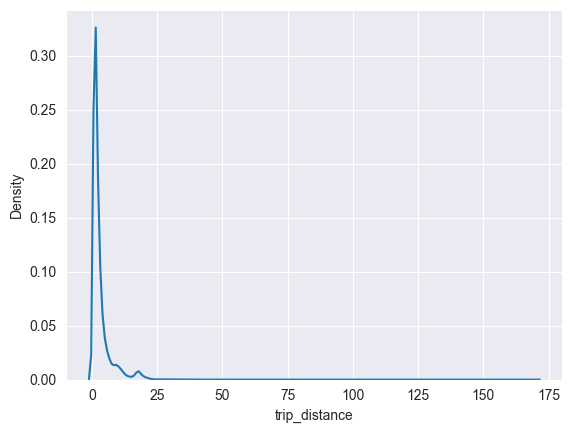

In [18]:
sns.kdeplot(data=df, x='trip_distance')

C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='trip_distance', ylabel='trip_time_sec'>

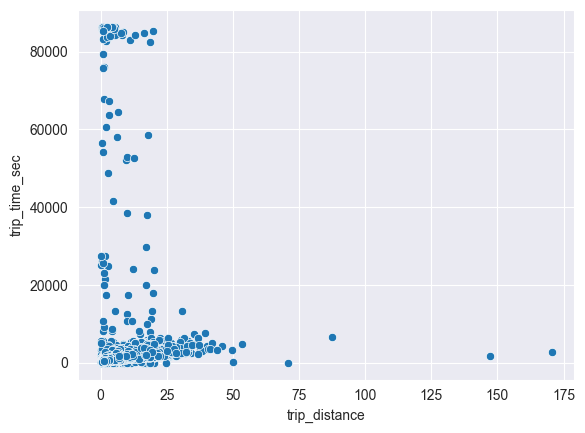

In [19]:
sns.scatterplot(data=df, x='trip_distance', y='trip_time_sec')

C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='trip_distance', ylabel='total_amount'>

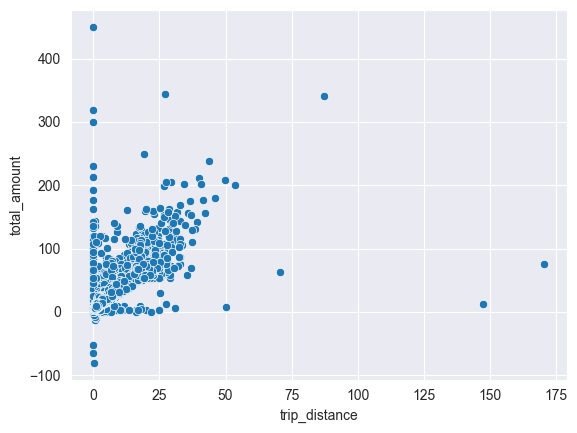

In [20]:
sns.scatterplot(data=df, x='trip_distance', y='total_amount')

In [21]:
df.loc[df['trip_distance'] == 0]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,imp_surcharge,trip_time_sec,pickup_weekday,dropoff_weekday,weekend_trip,pickup_hour,dropoff_hour,trip_haversine_km,trip_haversine_miles,trip_distance_manhattan
81,6,0.0,-73.983627,40.721775,1,N,-73.983688,40.721695,4.0,0.0,...,0.3,220,2,2,False,12,12,0.010286,0.006391,0.000141
337,1,0.0,-73.979553,40.762051,1,N,-73.979187,40.763073,2.5,1.0,...,0.3,53,1,1,False,18,18,0.117789,0.073191,0.001389
339,1,0.0,-73.901756,40.743519,2,N,-73.901749,40.743473,52.0,0.0,...,0.3,60,4,4,False,7,7,0.005131,0.003188,0.000053
497,1,0.0,-73.969704,40.785069,1,N,-73.969841,40.784779,2.5,1.0,...,0.3,38,4,4,False,16,16,0.034248,0.021281,0.000427
519,3,0.0,0.000000,0.000000,2,N,0.000000,0.000000,52.0,0.0,...,0.3,3,6,6,True,16,16,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99764,2,0.0,-73.984467,40.755001,1,N,-73.984474,40.754978,2.5,0.5,...,0.3,20,1,1,False,20,20,0.002625,0.001631,0.000031
99929,1,0.0,-73.794189,40.656658,1,N,-73.794189,40.656658,2.5,0.0,...,0.3,3,7,7,True,14,14,0.000000,0.000000,0.000000
100364,1,0.0,-73.975929,40.744617,2,N,-73.976578,40.743694,52.0,0.0,...,0.3,16,6,6,True,5,5,0.116284,0.072255,0.001572
100423,1,0.0,0.000000,0.000000,5,N,0.000000,0.000000,7.6,0.0,...,0.3,5,7,7,True,4,4,0.000000,0.000000,0.000000


In [22]:
df.loc[df['trip_distance'] > 50]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,imp_surcharge,trip_time_sec,pickup_weekday,dropoff_weekday,weekend_trip,pickup_hour,dropoff_hour,trip_haversine_km,trip_haversine_miles,trip_distance_manhattan
8674,1,170.500000,-73.782234,40.644623,2,N,-73.983826,40.749863,52.0,0.0,...,0.3,2883,7,7,True,19,20,20.634221,12.821510,0.306831
67215,1,53.599998,-73.968330,40.756351,5,N,-74.124031,41.316395,200.0,0.0,...,0.3,4707,5,5,True,8,9,63.628585,39.536970,0.715744
93288,3,87.389999,-73.789864,40.646702,5,N,-74.072708,41.497978,340.0,0.0,...,0.3,6589,3,4,False,23,1,97.581916,60.634591,1.134121
97190,1,147.199997,-73.991791,40.748501,5,N,-74.062012,40.862129,0.0,0.0,...,0.3,1676,4,4,False,6,6,13.948939,8.667469,0.183849
99552,1,70.660004,-73.783592,40.648659,2,N,-73.783127,40.644180,52.0,0.0,...,0.3,0,6,6,True,0,0,0.499528,0.310392,0.004944


In [23]:
df.loc[df['trip_haversine_km'] > 1000]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,imp_surcharge,trip_time_sec,pickup_weekday,dropoff_weekday,weekend_trip,pickup_hour,dropoff_hour,trip_haversine_km,trip_haversine_miles,trip_distance_manhattan
230,1,0.7,0.000000,0.000000,1,N,-73.987251,40.755417,11.0,1.0,...,0.3,1041,3,3,False,18,18,8666.399125,5385.050755,114.742668
233,1,0.9,0.000000,0.000000,1,N,-74.008652,40.706402,5.5,0.0,...,0.3,316,5,5,True,6,6,8667.169103,5385.529197,114.715054
688,2,6.3,-74.010513,40.704941,1,N,0.000000,0.000000,23.0,0.0,...,0.3,1295,6,6,True,12,13,8667.293506,5385.606497,114.715454
789,2,0.0,0.000000,0.000000,1,N,-73.979424,40.727631,2.5,0.5,...,0.3,2,6,6,True,4,4,8665.181976,5384.294453,114.707054
856,1,0.0,0.000000,0.000000,5,N,-73.776360,40.645641,60.0,0.0,...,0.3,2,4,4,False,7,7,8646.667967,5372.790381,114.422001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99088,1,2.0,0.000000,0.000000,1,N,-73.965370,40.710484,10.5,1.0,...,0.3,671,1,1,False,18,18,8663.666677,5383.352890,114.675854
99397,2,17.6,0.000000,0.000000,2,N,-73.788689,40.641434,52.0,0.0,...,0.3,3081,7,7,True,17,18,8647.602932,5373.371342,114.430122
99414,1,0.0,0.000000,0.000000,1,N,-74.015549,40.708229,2.5,1.0,...,0.3,5,5,5,True,18,18,8667.777889,5385.907479,114.723778
99555,2,0.0,-73.991402,40.749973,1,N,0.000000,0.000000,2.5,0.5,...,0.3,0,3,3,False,22,22,8666.631308,5385.195027,114.741375


## Pickup lat-lon

* We need to remove observations where those values oare beyond the scope (around -70, 40)

C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

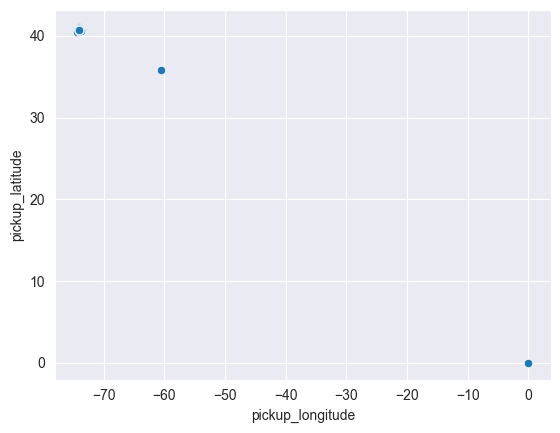

In [24]:
sns.scatterplot(data=df, x='pickup_longitude', y='pickup_latitude')

With below observation also is sth strange - remove it.

In [25]:
df.loc[(df['pickup_longitude'] > -70) & (df['pickup_longitude'] < -10)]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,imp_surcharge,trip_time_sec,pickup_weekday,dropoff_weekday,weekend_trip,pickup_hour,dropoff_hour,trip_haversine_km,trip_haversine_miles,trip_distance_manhattan
36954,1,0.0,-60.515377,35.871033,1,N,-73.964127,40.77121,3.0,0.0,...,0.3,69,3,3,False,8,9,1291.716826,802.635624,18.348927


## Ratecodeid

In [26]:
df['ratecodeid'].value_counts()

ratecodeid
1     97612
2      2412
5       326
3       187
4        55
6         1
99        1
Name: count, dtype: int64

Rate id = 99 seems nomal - I'd either delete it or make it 1 (standard ride)

In [27]:
df.loc[df['ratecodeid'] == 99]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,imp_surcharge,trip_time_sec,pickup_weekday,dropoff_weekday,weekend_trip,pickup_hour,dropoff_hour,trip_haversine_km,trip_haversine_miles,trip_distance_manhattan
44864,3,2.3,-73.962067,40.779411,99,Y,-73.980911,40.753441,15.5,0.0,...,0.3,1378,6,6,True,14,15,3.295145,2.047508,0.044815


C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='trip_distance', ylabel='total_amount'>

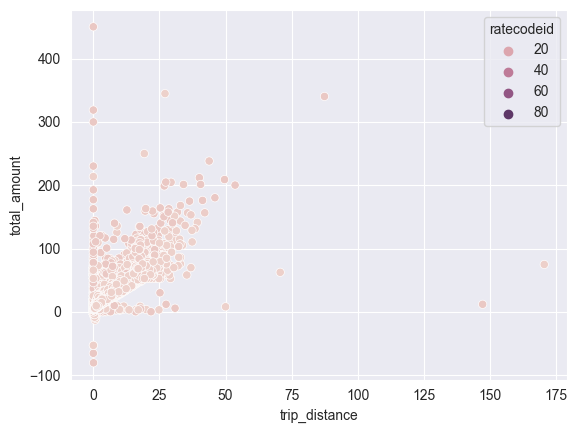

In [28]:
sns.scatterplot(data=df, x='trip_distance', y='total_amount', hue='ratecodeid')

## Store and fwd flag

nothing interesting

In [29]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    99852
Y      742
Name: count, dtype: int64

## Dropoff lat-lon

similar as with pickup lat lon

C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

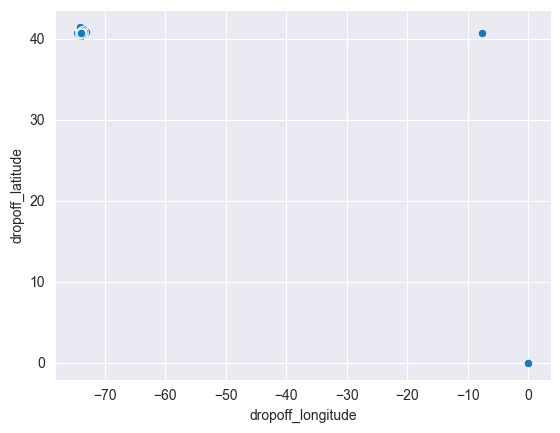

In [30]:
sns.scatterplot(data=df, x='dropoff_longitude', y='dropoff_latitude')

In [31]:
df.loc[(df['pickup_longitude'] > -70) & (df['pickup_longitude'] < -5)]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,imp_surcharge,trip_time_sec,pickup_weekday,dropoff_weekday,weekend_trip,pickup_hour,dropoff_hour,trip_haversine_km,trip_haversine_miles,trip_distance_manhattan
36954,1,0.0,-60.515377,35.871033,1,N,-73.964127,40.77121,3.0,0.0,...,0.3,69,3,3,False,8,9,1291.716826,802.635624,18.348927


## Amount cols

In [32]:
import matplotlib.pyplot as plt

sns.set()

### Fare amount

C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare_amount', ylabel='Density'>

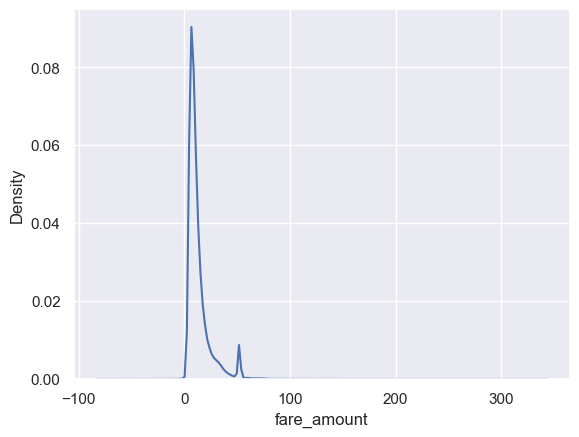

In [33]:
sns.kdeplot(data=df, x='fare_amount')

There are some observations when fare amount < 0. We should remove them

In [34]:
df.loc[df['fare_amount'] < 0]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,imp_surcharge,trip_time_sec,pickup_weekday,dropoff_weekday,weekend_trip,pickup_hour,dropoff_hour,trip_haversine_km,trip_haversine_miles,trip_distance_manhattan
281,2,0.41,-73.981850,40.754753,1,N,-73.988571,40.755829,-4.0,0.0,...,-0.3,209,3,3,False,6,6,0.578655,0.359560,0.007797
4189,4,0.39,-73.946976,40.772293,1,N,-73.951027,40.771542,-4.0,0.0,...,-0.3,149,7,7,True,18,18,0.351236,0.218248,0.004803
5227,1,0.76,-74.007233,40.717384,1,N,-73.997398,40.716587,-7.5,-0.5,...,-0.3,547,5,5,True,1,1,0.833555,0.517947,0.010632
6375,2,0.00,0.000000,0.000000,2,N,0.000000,0.000000,-52.0,0.0,...,-0.3,25122,6,7,True,17,0,0.000000,0.000000,0.000000
7243,1,0.10,-73.978806,40.729816,1,N,-73.980148,40.730385,-2.5,0.0,...,-0.3,44,6,6,True,13,13,0.129601,0.080530,0.001911
8265,1,0.96,-73.982513,40.731491,1,N,-73.996513,40.737999,-5.5,0.0,...,-0.3,314,5,5,True,10,10,1.383869,0.859896,0.020508
11501,1,0.91,-73.991882,40.743828,1,N,-74.004883,40.751488,-5.5,0.0,...,-0.3,298,2,2,False,12,12,1.387393,0.862086,0.020660
16670,1,0.17,-74.002808,40.733330,1,N,-74.003204,40.732796,-3.5,0.0,...,-0.3,158,7,7,True,9,9,0.068147,0.042344,0.000931
17954,1,0.00,-73.992447,40.743011,5,N,-73.992554,40.743031,-65.0,0.0,...,-0.3,133,3,3,False,22,22,0.009245,0.005745,0.000126
22403,1,0.46,-73.975548,40.753860,1,N,-73.973183,40.756531,-4.5,-0.5,...,-0.3,230,4,4,False,2,2,0.357561,0.222178,0.005035


In [35]:
df.loc[df['fare_amount'] > 100]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,imp_surcharge,trip_time_sec,pickup_weekday,dropoff_weekday,weekend_trip,pickup_hour,dropoff_hour,trip_haversine_km,trip_haversine_miles,trip_distance_manhattan
872,1,0.000000,-74.113731,40.734882,1,Y,0.000000,0.000000,213.0,0.0,...,0.3,0,5,5,True,15,15,8676.454895,5391.299120,114.848614
1043,1,24.500000,-73.780884,40.647701,5,N,-74.013550,40.805416,120.0,0.0,...,0.3,2414,1,1,False,2,2,26.304923,16.345121,0.390381
2855,1,0.000000,-73.814056,40.979488,5,N,-73.814056,40.979488,110.0,0.0,...,0.3,12,7,7,True,7,7,0.000000,0.000000,0.000000
3120,2,29.700001,-73.988297,40.750057,4,N,-73.587425,40.723789,109.5,0.5,...,0.3,3900,4,4,False,20,21,33.901067,21.065147,0.427139
3698,1,18.809999,-73.982018,40.752701,3,N,-74.185966,40.701561,112.0,1.0,...,0.3,7939,5,5,True,16,18,18.102394,11.248306,0.255089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93268,2,37.299999,-73.972618,40.756481,1,N,-73.669617,40.804268,102.5,0.0,...,0.3,4479,3,3,False,6,7,26.059884,16.192861,0.350788
93288,3,87.389999,-73.789864,40.646702,5,N,-74.072708,41.497978,340.0,0.0,...,0.3,6589,3,4,False,23,1,97.581916,60.634591,1.134121
93293,1,0.000000,-73.658745,40.726200,5,N,-73.658745,40.726200,112.5,0.0,...,0.3,20,5,5,True,23,23,0.000000,0.000000,0.000000
98940,1,43.799999,-73.781738,40.644855,4,N,-73.859520,41.151966,231.5,0.5,...,0.3,3399,6,6,True,1,2,56.765899,35.272695,0.584892


### extra

 as above

C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='extra', ylabel='Density'>

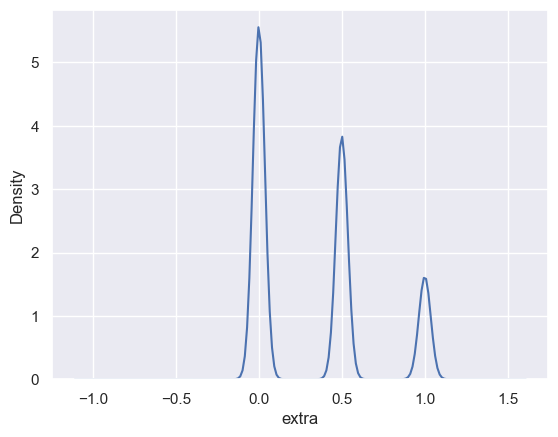

In [36]:
sns.kdeplot(data=df, x='extra')

In [37]:
df.loc[df['extra'] < 0]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,imp_surcharge,trip_time_sec,pickup_weekday,dropoff_weekday,weekend_trip,pickup_hour,dropoff_hour,trip_haversine_km,trip_haversine_miles,trip_distance_manhattan
5227,1,0.76,-74.007233,40.717384,1,N,-73.997398,40.716587,-7.5,-0.5,...,-0.3,547,5,5,True,1,1,0.833555,0.517947,0.010632
22403,1,0.46,-73.975548,40.753860,1,N,-73.973183,40.756531,-4.5,-0.5,...,-0.3,230,4,4,False,2,2,0.357561,0.222178,0.005035
40144,3,0.02,-73.988419,40.693836,1,N,0.000000,0.000000,-2.5,-1.0,...,-0.3,45,4,4,False,18,18,8665.235662,5384.327812,114.682255
44202,5,0.26,-73.876503,40.766029,1,N,-73.877792,40.764011,-3.5,-0.5,...,-0.3,120,6,6,True,22,22,0.249283,0.154897,0.003307
49813,1,0.00,-73.992043,40.750019,1,N,-73.992142,40.749973,-2.5,-0.5,...,-0.3,52,1,1,False,0,0,0.009783,0.006079,0.000145
51449,1,0.00,-73.990997,40.686020,1,N,-73.990799,40.686272,-2.5,-0.5,...,-0.3,26,3,3,False,23,23,0.032611,0.020264,0.000450
54517,1,0.00,-73.982231,40.768730,1,N,-73.981758,40.768650,-2.5,-0.5,...,-0.3,38,7,7,True,1,2,0.040819,0.025364,0.000553
57531,5,0.17,-73.978378,40.764568,1,N,-73.975456,40.763638,-3.5,-1.0,...,-0.3,126,5,5,True,17,17,0.266973,0.165889,0.003853
58159,1,0.10,-73.936531,40.697918,1,N,-73.935562,40.698963,-2.5,-0.5,...,-0.3,38,3,3,False,3,3,0.142057,0.088270,0.002014
58825,2,0.00,-74.004761,40.707619,1,N,-74.004692,40.707661,-2.5,-0.5,...,-0.3,50,5,5,True,1,1,0.007434,0.004619,0.000111


### mta tax

C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mta_tax', ylabel='Density'>

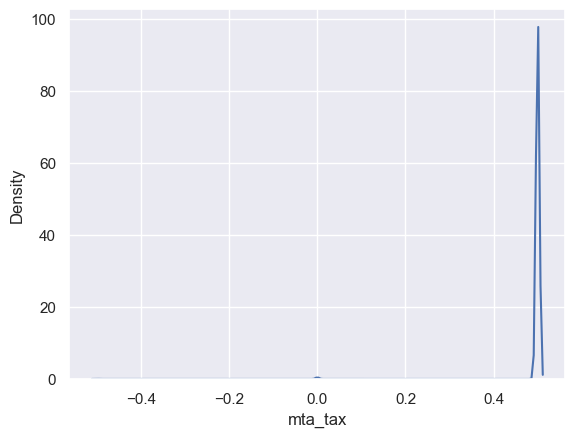

In [38]:
sns.kdeplot(data=df, x='mta_tax')

In [39]:
df.loc[df['mta_tax'] < 0]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,imp_surcharge,trip_time_sec,pickup_weekday,dropoff_weekday,weekend_trip,pickup_hour,dropoff_hour,trip_haversine_km,trip_haversine_miles,trip_distance_manhattan
281,2,0.41,-73.981850,40.754753,1,N,-73.988571,40.755829,-4.0,0.0,...,-0.3,209,3,3,False,6,6,0.578655,0.359560,0.007797
4189,4,0.39,-73.946976,40.772293,1,N,-73.951027,40.771542,-4.0,0.0,...,-0.3,149,7,7,True,18,18,0.351236,0.218248,0.004803
5227,1,0.76,-74.007233,40.717384,1,N,-73.997398,40.716587,-7.5,-0.5,...,-0.3,547,5,5,True,1,1,0.833555,0.517947,0.010632
6375,2,0.00,0.000000,0.000000,2,N,0.000000,0.000000,-52.0,0.0,...,-0.3,25122,6,7,True,17,0,0.000000,0.000000,0.000000
7243,1,0.10,-73.978806,40.729816,1,N,-73.980148,40.730385,-2.5,0.0,...,-0.3,44,6,6,True,13,13,0.129601,0.080530,0.001911
8265,1,0.96,-73.982513,40.731491,1,N,-73.996513,40.737999,-5.5,0.0,...,-0.3,314,5,5,True,10,10,1.383869,0.859896,0.020508
11501,1,0.91,-73.991882,40.743828,1,N,-74.004883,40.751488,-5.5,0.0,...,-0.3,298,2,2,False,12,12,1.387393,0.862086,0.020660
16670,1,0.17,-74.002808,40.733330,1,N,-74.003204,40.732796,-3.5,0.0,...,-0.3,158,7,7,True,9,9,0.068147,0.042344,0.000931
22403,1,0.46,-73.975548,40.753860,1,N,-73.973183,40.756531,-4.5,-0.5,...,-0.3,230,4,4,False,2,2,0.357561,0.222178,0.005035
31395,1,0.32,-73.952461,40.824009,1,N,-73.953300,40.820221,-3.5,0.0,...,-0.3,120,2,2,False,12,12,0.427085,0.265378,0.004627


### tip amount

C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tip_amount', ylabel='Density'>

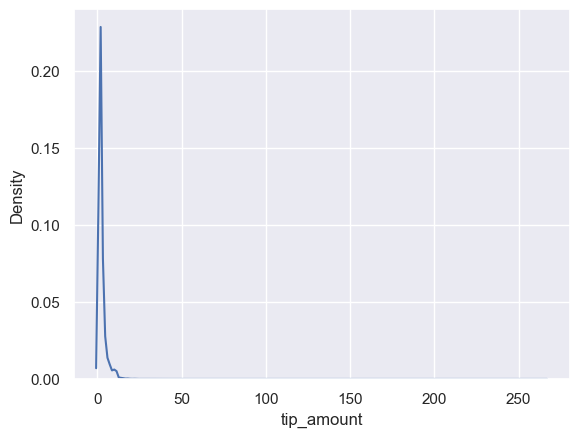

In [41]:
sns.kdeplot(data=df, x='tip_amount')

In [43]:
df.loc[df['tip_amount'] > 30]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,imp_surcharge,trip_time_sec,pickup_weekday,dropoff_weekday,weekend_trip,pickup_hour,dropoff_hour,trip_haversine_km,trip_haversine_miles,trip_distance_manhattan
9236,1,0.000000,-73.832764,41.059429,5,N,-73.832970,41.059696,130.0,0.0,...,0.3,63,2,2,False,16,16,0.034350,0.021344,0.000473
10559,1,27.100000,-74.164146,40.618874,1,N,-73.950554,40.808949,78.0,0.0,...,0.3,4374,6,6,True,12,13,27.763020,17.251141,0.403667
11776,1,26.820000,-73.864197,40.765858,5,N,-73.421928,40.783710,165.0,0.0,...,0.3,1959,2,2,False,17,18,37.294523,23.173742,0.460121
26212,1,1.400000,-73.989265,40.734085,1,N,-73.987900,40.719395,6.5,0.5,...,0.3,371,3,3,False,1,1,1.637549,1.017526,0.016056
33841,1,26.580000,-73.876328,40.772266,5,N,-73.832527,41.059887,116.0,0.0,...,0.3,2026,7,7,True,0,1,32.193057,20.003838,0.331421
35010,1,19.270000,-73.975105,40.765198,1,N,-74.072388,40.902721,145.5,0.0,...,0.3,13419,3,3,False,10,14,17.344431,10.777330,0.234806
50322,4,9.250000,-73.953476,40.779507,1,N,-73.996506,40.692287,34.0,0.0,...,0.3,2453,1,1,False,14,15,10.353848,6.433583,0.130249
50821,1,0.000000,0.000000,0.000000,5,N,0.000000,0.000000,141.0,0.0,...,0.3,4,1,1,False,13,13,0.000000,0.000000,0.000000
55479,1,0.000000,0.000000,0.000000,1,N,0.000000,0.000000,2.5,0.0,...,0.3,5,5,5,True,6,6,0.000000,0.000000,0.000000
55561,1,16.500000,-73.990013,40.747543,2,N,-73.790466,40.646843,52.0,0.0,...,0.3,4306,5,5,True,16,17,20.208494,12.556976,0.300247


In [40]:
df.columns

Index(['passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'ratecodeid', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'vendor_id',
       'pickup_datetime', 'dropoff_datetime', 'payment_type', 'imp_surcharge',
       'trip_time_sec', 'pickup_weekday', 'dropoff_weekday', 'weekend_trip',
       'pickup_hour', 'dropoff_hour', 'trip_haversine_km',
       'trip_haversine_miles', 'trip_distance_manhattan'],
      dtype='object')